In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
data=pd.read_csv("Fraud_check.csv")

# EDA and data visualization

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.shape

(600, 6)

In [6]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data=data.drop(["City.Population"],axis=1)

In [9]:
data.corr()

,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


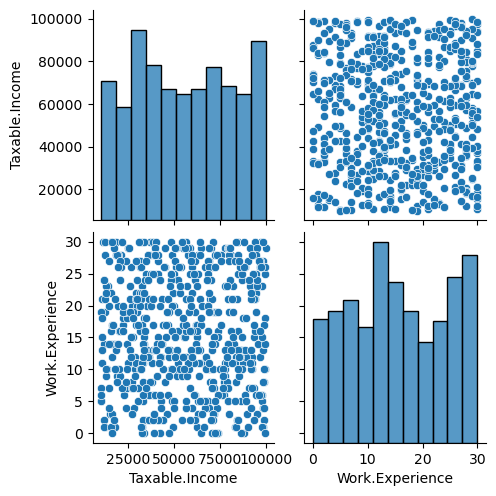

In [10]:
sns.pairplot(data)

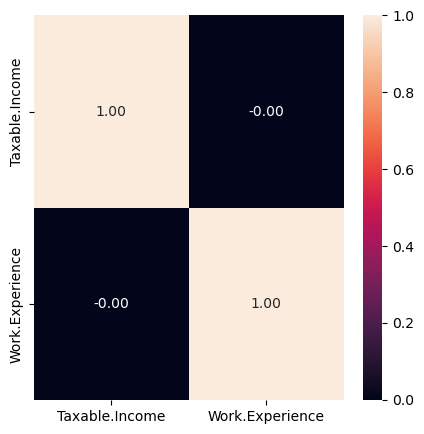

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

In [12]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO


In [13]:
label=LabelEncoder()
data["Undergrad"]=label.fit_transform(data["Undergrad"])
data["Marital.Status"]=label.fit_transform(data["Marital.Status"])
data["Urban"]=label.fit_transform(data["Urban"])

In [14]:
data["Taxable.Income"]=np.where(data["Taxable.Income"]<=30000,0,1)

In [15]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,1,10,1
1,1,0,1,18,1
2,0,1,1,30,1
3,1,2,1,15,1
4,0,1,1,28,0


# model building

In [16]:
x=data.drop(["Taxable.Income"],axis="columns")
y=data["Taxable.Income"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train

,Undergrad,Marital.Status,Work.Experience,Urban
82,0,0,26,1
568,0,2,22,1
347,0,1,0,1
544,0,2,21,1
34,1,0,1,1
...,...,...,...,...
129,1,2,26,0
144,1,2,29,1
72,1,0,27,1
235,0,0,9,0


# decision tree using gini criteria

In [18]:
model=DecisionTreeClassifier(criterion="gini",min_samples_split=5,max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

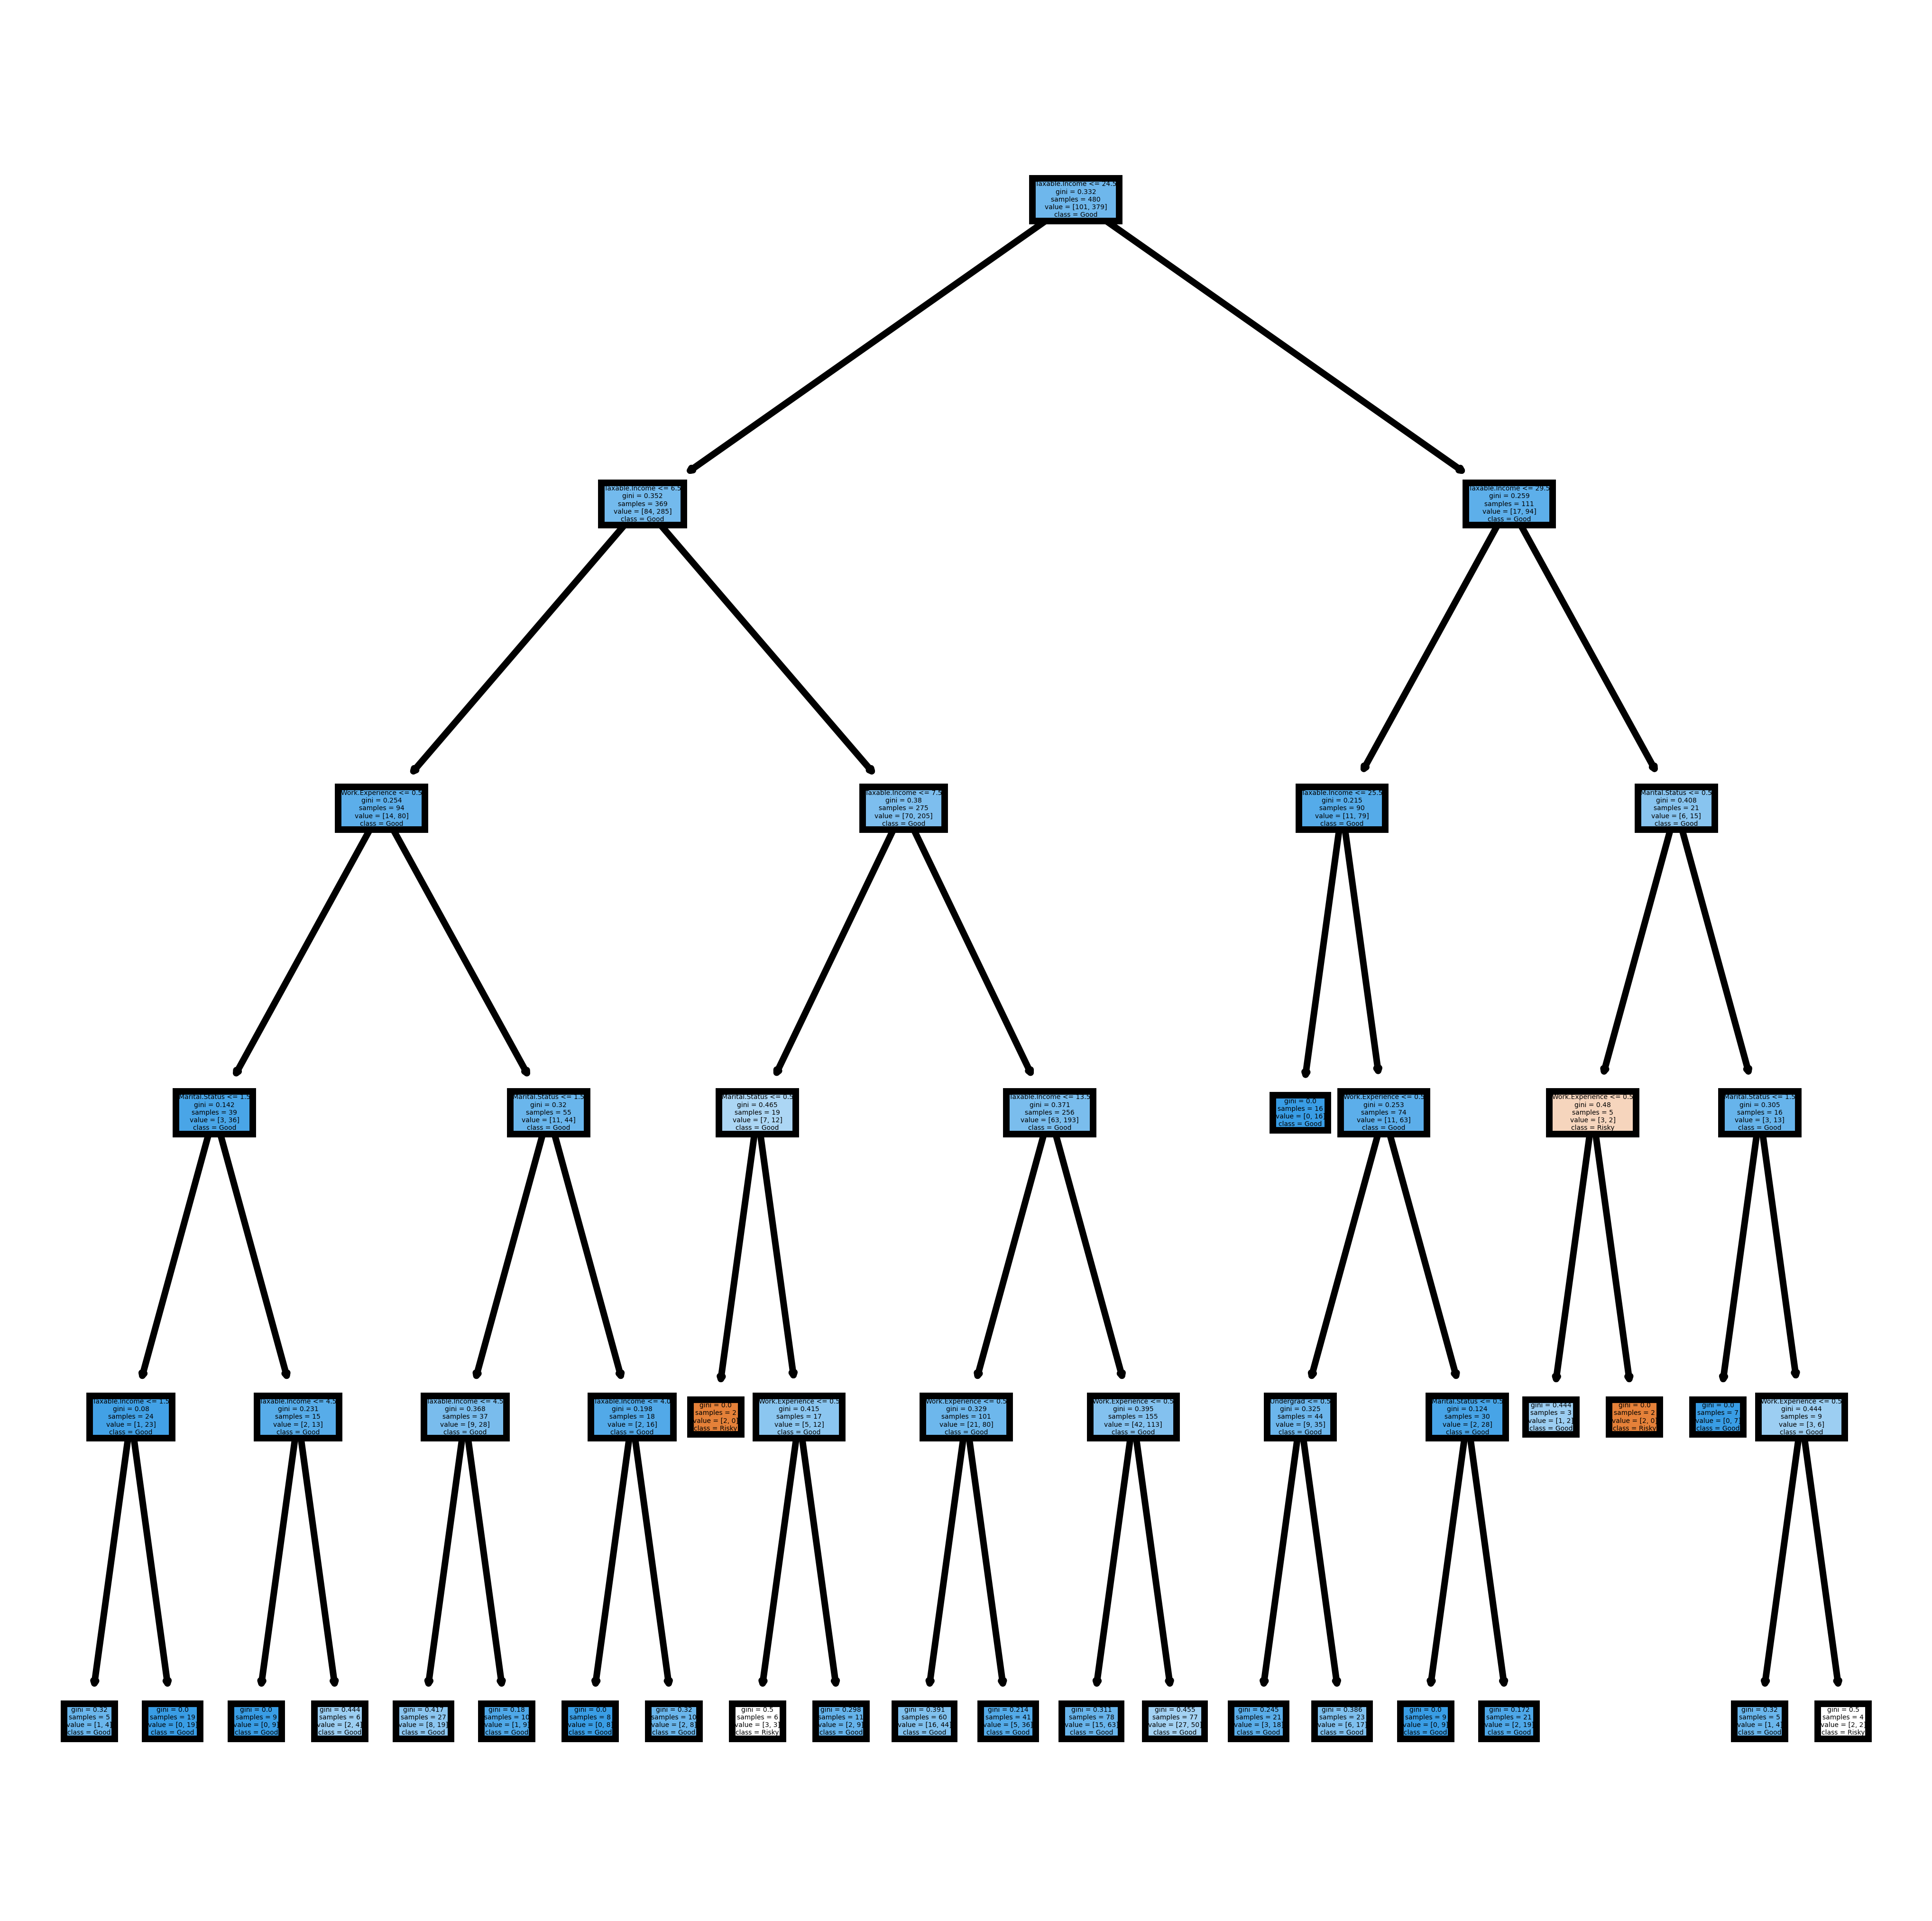

In [19]:
fn=list(data.columns)
cn=["Risky","Good"]
plt.subplots(figsize = (5,5), dpi=1000)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);
plt.show()

In [20]:

pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.20      0.04      0.07        23
           1       0.81      0.96      0.88        97

    accuracy                           0.78       120
   macro avg       0.50      0.50      0.47       120
weighted avg       0.69      0.78      0.72       120



# decision tree using entropy criteria

In [21]:
model=DecisionTreeClassifier(criterion="entropy",min_samples_split=5,max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

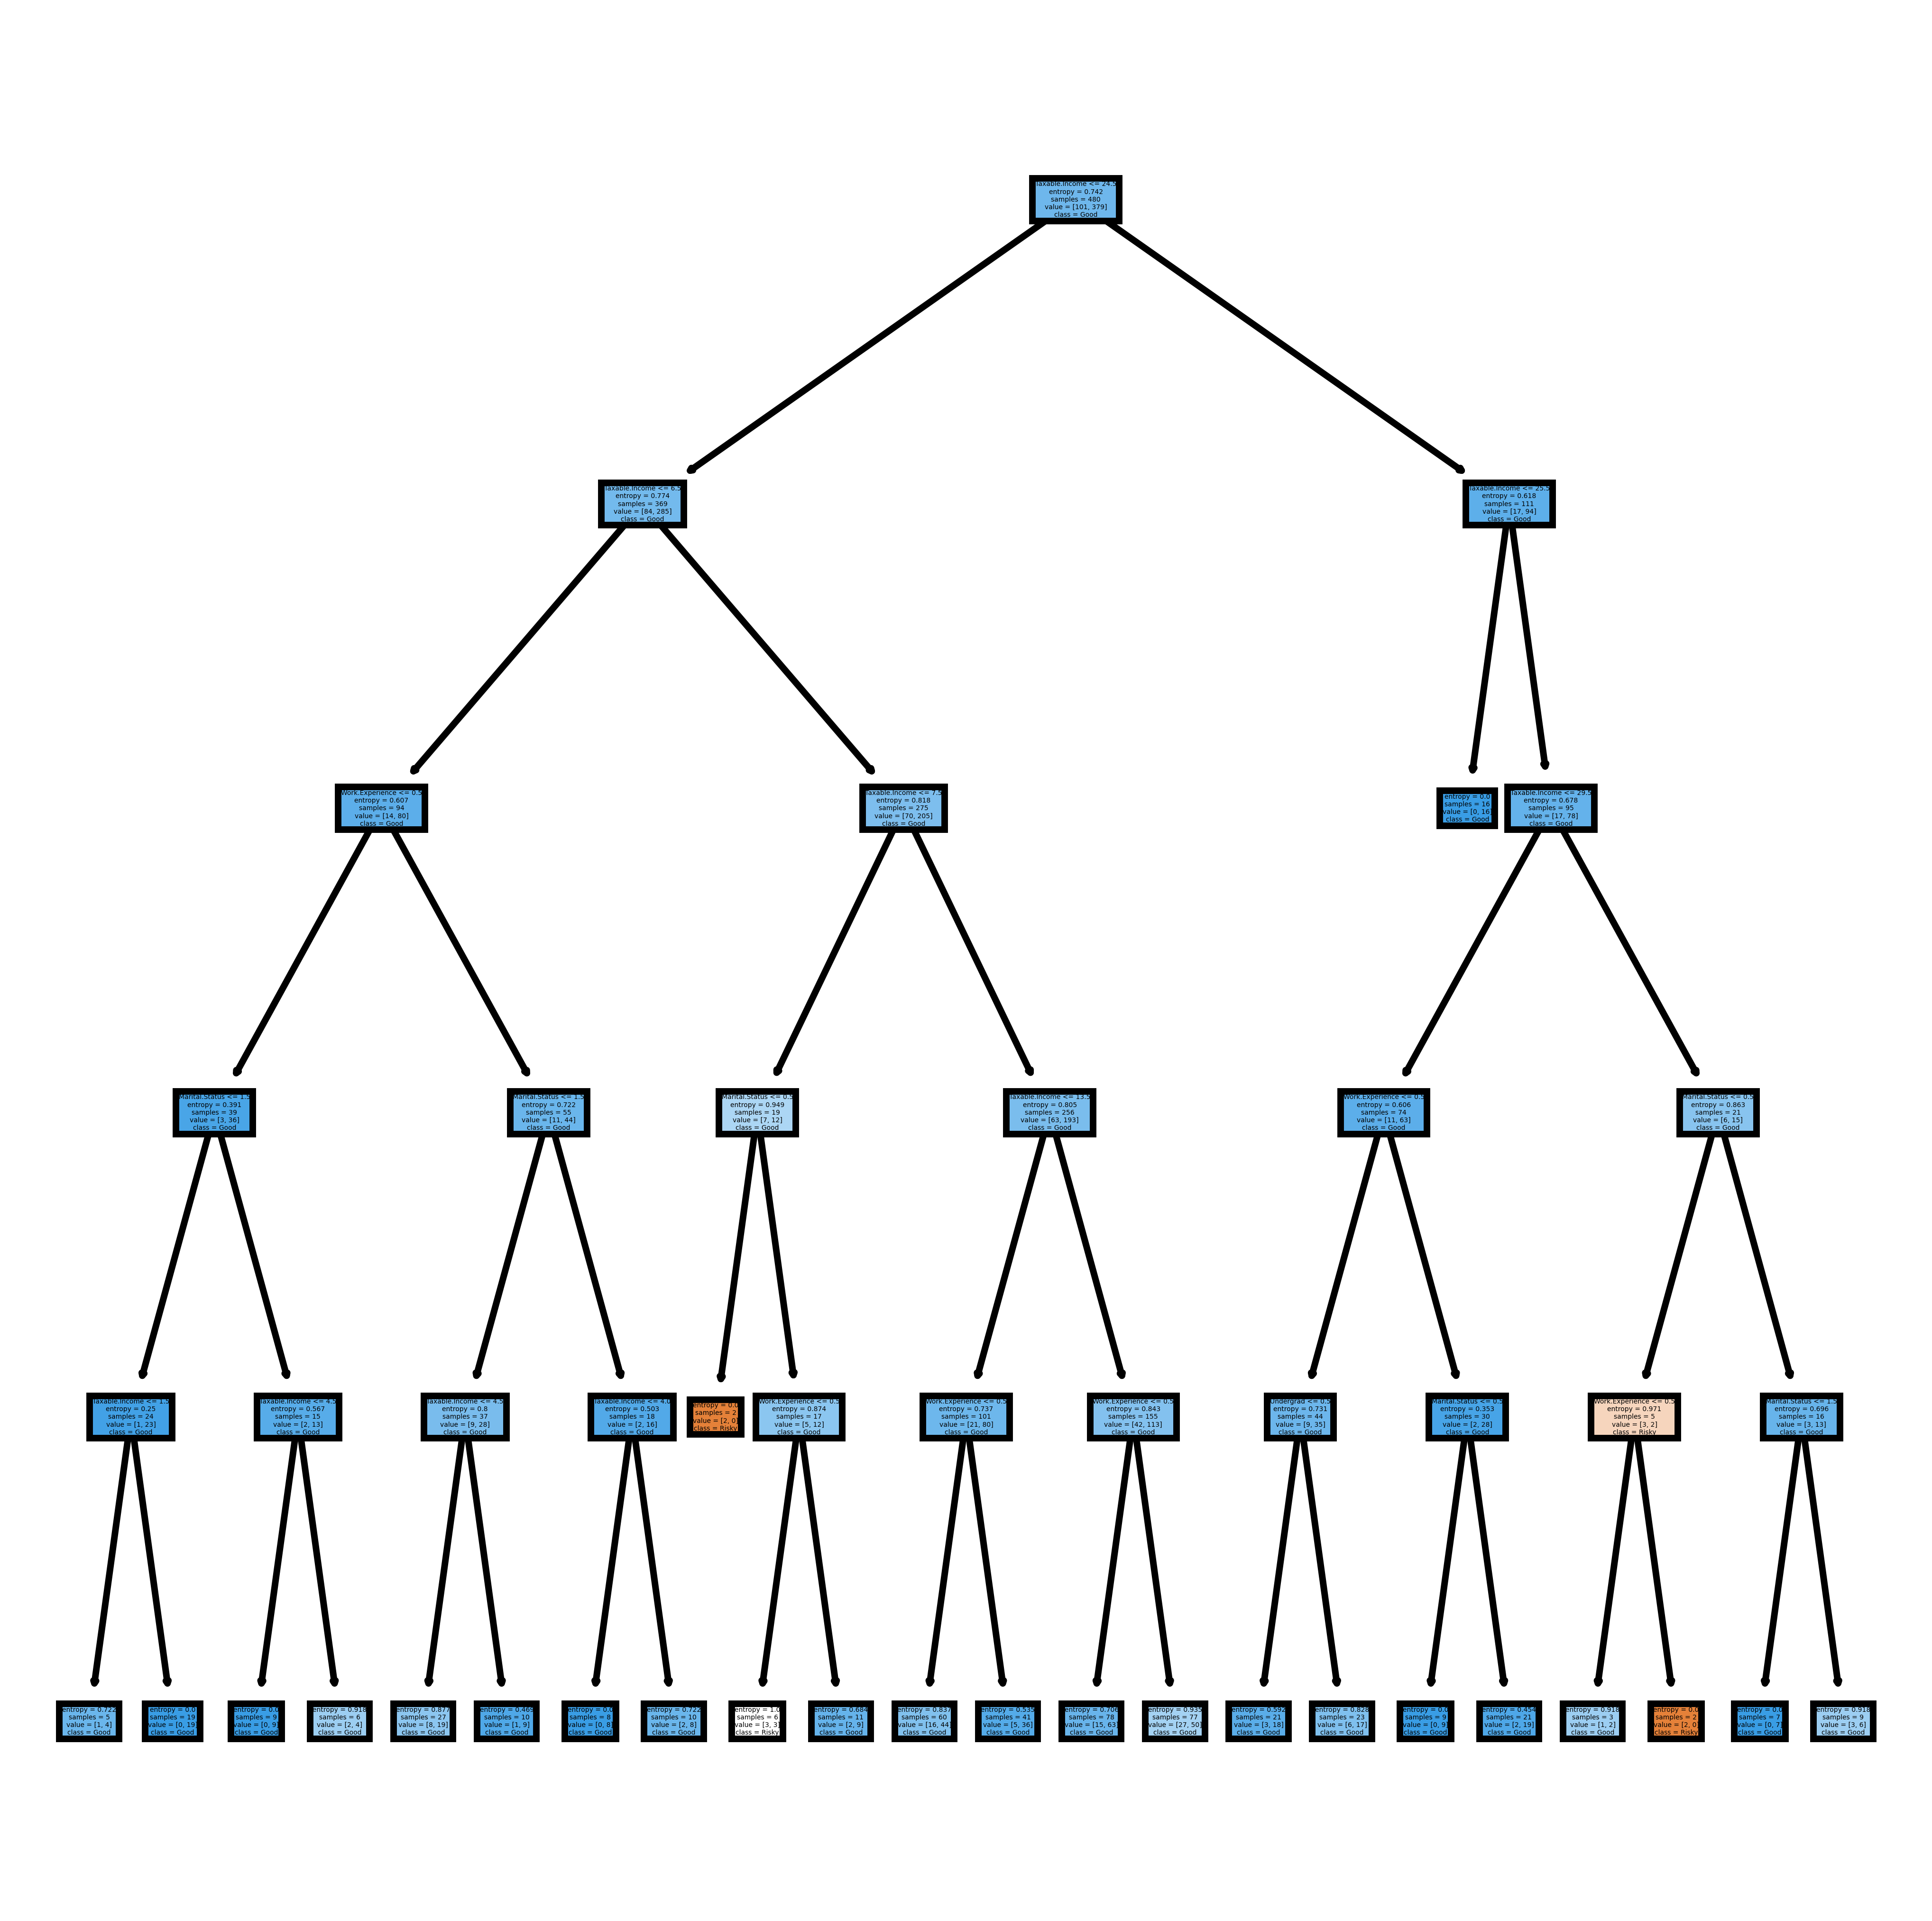

In [22]:
fn=list(data.columns)
cn=["Risky","Good"]
plt.subplots(figsize = (5,5), dpi=1000)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);
plt.show()

In [23]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.25      0.04      0.07        23
           1       0.81      0.97      0.88        97

    accuracy                           0.79       120
   macro avg       0.53      0.51      0.48       120
weighted avg       0.70      0.79      0.73       120

